In [1]:
import pandas as pd
data = [
    [1, "Inception", "Sci-Fi", "2010-07-16", 8.8, 825532764, 160000000],
    [2, "The Dark Knight", "Action", "2008-07-18", 9.0, 1004558444, 185000000],
    [3, "Titanic", "Romance", "1997-12-19", 7.8, 2187463944, 200000000],
    [4, "Interstellar", "Sci-Fi", "2014-11-07", 8.6, 677471339, 165000000],
    [5, "Joker", "Drama", "2019-10-04", 8.4, 1074251311, 55000000],
    [6, "The Notebook", "Romance", "2004-06-25", 7.9, None, 29000000],
    [7, "Avengers: Endgame", "Action", "2019-04-26", 8.4, 2797800564, 356000000]
]

columns = ["MovieID", "Title", "Genre", "ReleaseDate", "Rating", "Revenue", "Budget"]

# Create DataFrame and save to CSV
df = pd.DataFrame(data, columns=columns)
df.to_csv("movies.csv", index=False)

print(" movies.csv created successfully!")


 movies.csv created successfully!


In [2]:
#1
import pandas as pd
df=pd.read_csv("movies.csv")
df.head()

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000


In [3]:
#2
df["ReleaseDate"]=pd.to_datetime(df["ReleaseDate"])
print(df.dtypes["ReleaseDate"])
print(df[["Title","ReleaseDate"]].head())

datetime64[ns]
             Title ReleaseDate
0        Inception  2010-07-16
1  The Dark Knight  2008-07-18
2          Titanic  1997-12-19
3     Interstellar  2014-11-07
4            Joker  2019-10-04


In [5]:
#3
df["Profit"]=df["Revenue"]-df["Budget"]
print(df[["Title", "Revenue", "Budget", "Profit"]])

               Title       Revenue     Budget        Profit
0          Inception  8.255328e+08  160000000  6.655328e+08
1    The Dark Knight  1.004558e+09  185000000  8.195584e+08
2            Titanic  2.187464e+09  200000000  1.987464e+09
3       Interstellar  6.774713e+08  165000000  5.124713e+08
4              Joker  1.074251e+09   55000000  1.019251e+09
5       The Notebook           NaN   29000000           NaN
6  Avengers: Endgame  2.797801e+09  356000000  2.441801e+09


In [6]:
#4
release_year=df["ReleaseDate"].dt.year
def get_era(year):
    if year < 2000:
        return "Classic"
    elif year <= 2010:
        return "Mid"
    else:
        return "Modern"
df["Era"]=release_year.apply(get_era)
print(df[["Title", "ReleaseDate", "Era"]])

               Title ReleaseDate      Era
0          Inception  2010-07-16      Mid
1    The Dark Knight  2008-07-18      Mid
2            Titanic  1997-12-19  Classic
3       Interstellar  2014-11-07   Modern
4              Joker  2019-10-04   Modern
5       The Notebook  2004-06-25      Mid
6  Avengers: Endgame  2019-04-26   Modern


In [7]:
#5
avg_revenue=df["Revenue"].mean()
df["Revenue"]=df["Revenue"].fillna(avg_revenue)
df["Profit"]=df["Revenue"]-df["Budget"]
print(df[df["Title"]=="The Notebook"][["Title", "Revenue", "Budget", "Profit"]])

          Title       Revenue    Budget        Profit
5  The Notebook  1.427846e+09  29000000  1.398846e+09


In [8]:
#6
df_sorted=df.sort_values(by="Rating",ascending=False)
print(df_sorted[["Title","Rating"]])

               Title  Rating
1    The Dark Knight     9.0
0          Inception     8.8
3       Interstellar     8.6
6  Avengers: Endgame     8.4
4              Joker     8.4
5       The Notebook     7.9
2            Titanic     7.8


In [10]:
#7
genre_stats=df.groupby("Genre").agg({
    "Rating":"mean",
    "Revenue":"sum"
})
genre_stats=genre_stats.rename(columns={
    "Rating":"AverageRating",
    "Revenue":"Total Revenue"

})
print(genre_stats)

         AverageRating  Total Revenue
Genre                                
Action            8.70   3.802359e+09
Drama             8.40   1.074251e+09
Romance           7.85   3.615310e+09
Sci-Fi            8.70   1.503004e+09


In [11]:
#8
top_movies=df[(df["Rating"]>=8.5) & (df["Profit"]> 500_00_000)]
print(top_movies[["Title", "Rating", "Profit"]])

             Title  Rating       Profit
0        Inception     8.8  665532764.0
1  The Dark Knight     9.0  819558444.0
3     Interstellar     8.6  512471339.0


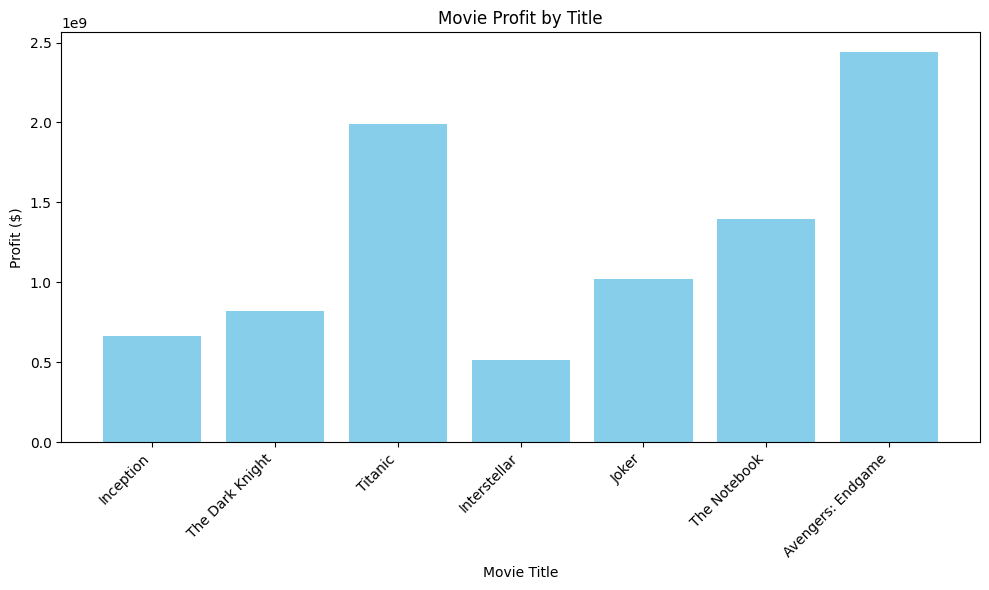

In [12]:
#9
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot bar chart: Movie Title vs Profit
plt.bar(df["Title"], df["Profit"], color="skyblue")

# Add titles and labels
plt.title("Movie Profit by Title")
plt.xlabel("Movie Title")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
#PART-2
#1
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MovieAnalysis").getOrCreate()

df_spark = spark.read.option("header", True).option("inferSchema", True).csv("movies.csv")

df_spark.show(5)

df_spark.printSchema()


+-------+---------------+-------+-----------+------+-------------+---------+
|MovieID|          Title|  Genre|ReleaseDate|Rating|      Revenue|   Budget|
+-------+---------------+-------+-----------+------+-------------+---------+
|      1|      Inception| Sci-Fi| 2010-07-16|   8.8| 8.25532764E8|160000000|
|      2|The Dark Knight| Action| 2008-07-18|   9.0|1.004558444E9|185000000|
|      3|        Titanic|Romance| 1997-12-19|   7.8|2.187463944E9|200000000|
|      4|   Interstellar| Sci-Fi| 2014-11-07|   8.6| 6.77471339E8|165000000|
|      5|          Joker|  Drama| 2019-10-04|   8.4|1.074251311E9| 55000000|
+-------+---------------+-------+-----------+------+-------------+---------+
only showing top 5 rows

root
 |-- MovieID: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- ReleaseDate: date (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Budget: integer (nullable = true)



In [14]:
#2
from pyspark.sql.functions import col
df_spark=df_spark.withColumn("Profit",col("Revenue")-col("Budget"))
df_spark.select("Title", "Revenue", "Budget", "Profit").show()

+-----------------+-------------+---------+-------------+
|            Title|      Revenue|   Budget|       Profit|
+-----------------+-------------+---------+-------------+
|        Inception| 8.25532764E8|160000000| 6.65532764E8|
|  The Dark Knight|1.004558444E9|185000000| 8.19558444E8|
|          Titanic|2.187463944E9|200000000|1.987463944E9|
|     Interstellar| 6.77471339E8|165000000| 5.12471339E8|
|            Joker|1.074251311E9| 55000000|1.019251311E9|
|     The Notebook|         NULL| 29000000|         NULL|
|Avengers: Endgame|2.797800564E9|356000000|2.441800564E9|
+-----------------+-------------+---------+-------------+



In [16]:
#3

sci_fi_hits = df_spark.filter(
    (col("Genre") == "Sci-Fi") & (col("Profit") > 500_000_000)
)
sci_fi_hits.select("Title", "Genre", "Profit").show()


+------------+------+------------+
|       Title| Genre|      Profit|
+------------+------+------------+
|   Inception|Sci-Fi|6.65532764E8|
|Interstellar|Sci-Fi|5.12471339E8|
+------------+------+------------+



In [20]:
#4
genre_grouped=df_spark.groupBy("Genre").agg({
    "Rating":"avg",
    "Profit":"sum"
})
genre_grouped=genre_grouped.withColumnRenamed("avg(Rating)","AverageRating")\
       .withColumnRenamed("sum(Profit)","TotalProfit")
genre_grouped.show()

+-------+-------------+-------------+
|  Genre|AverageRating|  TotalProfit|
+-------+-------------+-------------+
|Romance|         7.85|1.987463944E9|
|  Drama|          8.4|1.019251311E9|
| Action|          8.7|3.261359008E9|
| Sci-Fi|          8.7|1.178004103E9|
+-------+-------------+-------------+



In [24]:
#5
from pyspark.sql.functions import when
df_spark = df_spark.withColumn(
    "RatingCategory",
    when(col("Rating") == 9.0, "Blockbuster")
    .when((col("Rating") >= 8.0) & (col("Rating") < 9.0), "Hit")
    .otherwise("Average")
)
df_spark.select("Title", "Rating", "RatingCategory").show()


+-----------------+------+--------------+
|            Title|Rating|RatingCategory|
+-----------------+------+--------------+
|        Inception|   8.8|           Hit|
|  The Dark Knight|   9.0|   Blockbuster|
|          Titanic|   7.8|       Average|
|     Interstellar|   8.6|           Hit|
|            Joker|   8.4|           Hit|
|     The Notebook|   7.9|       Average|
|Avengers: Endgame|   8.4|           Hit|
+-----------------+------+--------------+



In [26]:
#6
df_spark=df_spark.drop("Budjet")
print(df_spark.columns)

['MovieID', 'Title', 'Genre', 'ReleaseDate', 'Rating', 'Revenue', 'Budget', 'Profit', 'RatingCategory']


In [27]:
#7
avg_revenue = df_spark.selectExpr("avg(Revenue)").first()[0]
df_spark = df_spark.na.fill({"Revenue": avg_revenue})
df_spark = df_spark.withColumn("Profit", col("Revenue") - col("Budget"))

df_spark.select("Title", "Revenue", "Profit").show()


+-----------------+--------------------+--------------------+
|            Title|             Revenue|              Profit|
+-----------------+--------------------+--------------------+
|        Inception|        8.25532764E8|        6.65532764E8|
|  The Dark Knight|       1.004558444E9|        8.19558444E8|
|          Titanic|       2.187463944E9|       1.987463944E9|
|     Interstellar|        6.77471339E8|        5.12471339E8|
|            Joker|       1.074251311E9|       1.019251311E9|
|     The Notebook|1.4278463943333333E9|1.3988463943333333E9|
|Avengers: Endgame|       2.797800564E9|       2.441800564E9|
+-----------------+--------------------+--------------------+



In [28]:
#8
from pyspark.sql.functions import to_date, year, month


df_spark = df_spark.withColumn("ReleaseDate", to_date(col("ReleaseDate"), "yyyy-MM-dd"))


df_spark = df_spark.withColumn("ReleaseYear", year(col("ReleaseDate")))
df_spark = df_spark.withColumn("ReleaseMonth", month(col("ReleaseDate")))


df_spark.select("Title", "ReleaseDate", "ReleaseYear", "ReleaseMonth").show()


+-----------------+-----------+-----------+------------+
|            Title|ReleaseDate|ReleaseYear|ReleaseMonth|
+-----------------+-----------+-----------+------------+
|        Inception| 2010-07-16|       2010|           7|
|  The Dark Knight| 2008-07-18|       2008|           7|
|          Titanic| 1997-12-19|       1997|          12|
|     Interstellar| 2014-11-07|       2014|          11|
|            Joker| 2019-10-04|       2019|          10|
|     The Notebook| 2004-06-25|       2004|           6|
|Avengers: Endgame| 2019-04-26|       2019|           4|
+-----------------+-----------+-----------+------------+



In [31]:
#9
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
genre_window=Window.partitionBy("Genre").orderBy(col("Profit").desc())
df_spark=df_spark.withColumn("GenreProfitRank",rank().over(genre_window))
df_spark.select("Title", "Genre", "Profit", "GenreProfitRank").show()

+-----------------+-------+--------------------+---------------+
|            Title|  Genre|              Profit|GenreProfitRank|
+-----------------+-------+--------------------+---------------+
|Avengers: Endgame| Action|       2.441800564E9|              1|
|  The Dark Knight| Action|        8.19558444E8|              2|
|            Joker|  Drama|       1.019251311E9|              1|
|          Titanic|Romance|       1.987463944E9|              1|
|     The Notebook|Romance|1.3988463943333333E9|              2|
|        Inception| Sci-Fi|        6.65532764E8|              1|
|     Interstellar| Sci-Fi|        5.12471339E8|              2|
+-----------------+-------+--------------------+---------------+



In [32]:
#PART-3
import json

# Data for bonus movies
bonus_movies = [
    {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue": 1456000000, "Budget": 145000000},
    {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue": 950000000, "Budget": 100000000}
]
with open("movies_bonus.json", "w") as f:
    json.dump(bonus_movies, f, indent=4)

print("movies_bonus.json created!")



movies_bonus.json created!


In [33]:
# Read the JSON file into a Spark DataFrame
df_bonus = spark.read.option("multiline", True).json("movies_bonus.json")
df_bonus.show()


+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [34]:
#2
columns_to_keep = ["MovieID", "Title", "Genre", "Rating", "Revenue", "Budget"]
df_main_clean=df_spark.select(*columns_to_keep)
df_bonus_clean=df_spark.select(*columns_to_keep)
df_merged=df_main_clean.union(df_bonus_clean)
df_merged.show()

+-------+-----------------+-------+------+--------------------+---------+
|MovieID|            Title|  Genre|Rating|             Revenue|   Budget|
+-------+-----------------+-------+------+--------------------+---------+
|      1|        Inception| Sci-Fi|   8.8|        8.25532764E8|160000000|
|      2|  The Dark Knight| Action|   9.0|       1.004558444E9|185000000|
|      3|          Titanic|Romance|   7.8|       2.187463944E9|200000000|
|      4|     Interstellar| Sci-Fi|   8.6|        6.77471339E8|165000000|
|      5|            Joker|  Drama|   8.4|       1.074251311E9| 55000000|
|      6|     The Notebook|Romance|   7.9|1.4278463943333333E9| 29000000|
|      7|Avengers: Endgame| Action|   8.4|       2.797800564E9|356000000|
|      1|        Inception| Sci-Fi|   8.8|        8.25532764E8|160000000|
|      2|  The Dark Knight| Action|   9.0|       1.004558444E9|185000000|
|      3|          Titanic|Romance|   7.8|       2.187463944E9|200000000|
|      4|     Interstellar| Sci-Fi|   

In [35]:
#3
df_merged.orderBy(col("Revenue").desc()).select("Title","Revenue").show(5)

+-----------------+--------------------+
|            Title|             Revenue|
+-----------------+--------------------+
|Avengers: Endgame|       2.797800564E9|
|Avengers: Endgame|       2.797800564E9|
|          Titanic|       2.187463944E9|
|          Titanic|       2.187463944E9|
|     The Notebook|1.4278463943333333E9|
+-----------------+--------------------+
only showing top 5 rows



In [36]:
# Save the merged DataFrame to a CSV file
df_merged.write.mode("overwrite").option("header", True).csv("final_movies_output")

print(" Final merged DataFrame saved as 'final_movies_output/' folder with CSV files inside.")


 Final merged DataFrame saved as 'final_movies_output/' folder with CSV files inside.


In [37]:
#BONUS

import pandas as pd

# Combine original and bonus data
data = [
    [1, "Inception", "Sci-Fi", "2010-07-16", 8.8, 825532764, 160000000],
    [2, "The Dark Knight", "Action", "2008-07-18", 9.0, 1004558444, 185000000],
    [3, "Titanic", "Romance", "1997-12-19", 7.8, 2187463944, 200000000],
    [4, "Interstellar", "Sci-Fi", "2014-11-07", 8.6, 677471339, 165000000],
    [5, "Joker", "Drama", "2019-10-04", 8.4, 1074251311, 55000000],
    [6, "The Notebook", "Romance", "2004-06-25", 7.9, 1183224071, 29000000],
    [7, "Avengers: Endgame", "Action", "2019-04-26", 8.4, 2797800564, 356000000],
    [8, "Barbie", "Drama", "2023-07-21", 7.5, 1456000000, 145000000],
    [9, "Oppenheimer", "Drama", "2023-07-21", 8.6, 950000000, 100000000]
]

columns = ["MovieID", "Title", "Genre", "ReleaseDate", "Rating", "Revenue", "Budget"]
df = pd.DataFrame(data, columns=columns)

# Calculate Profit and ROI
df["Profit"] = df["Revenue"] - df["Budget"]
df["ROI"] = df["Profit"] / df["Budget"]

# Filter movies with budget ≥ 50M
df_filtered = df[df["Budget"] >= 50000000]

# Show ROI values
print(df_filtered[["Title", "Genre", "Budget", "Profit", "ROI"]])


               Title    Genre     Budget      Profit        ROI
0          Inception   Sci-Fi  160000000   665532764   4.159580
1    The Dark Knight   Action  185000000   819558444   4.430046
2            Titanic  Romance  200000000  1987463944   9.937320
3       Interstellar   Sci-Fi  165000000   512471339   3.105887
4              Joker    Drama   55000000  1019251311  18.531842
6  Avengers: Endgame   Action  356000000  2441800564   6.858990
7             Barbie    Drama  145000000  1311000000   9.041379
8        Oppenheimer    Drama  100000000   850000000   8.500000


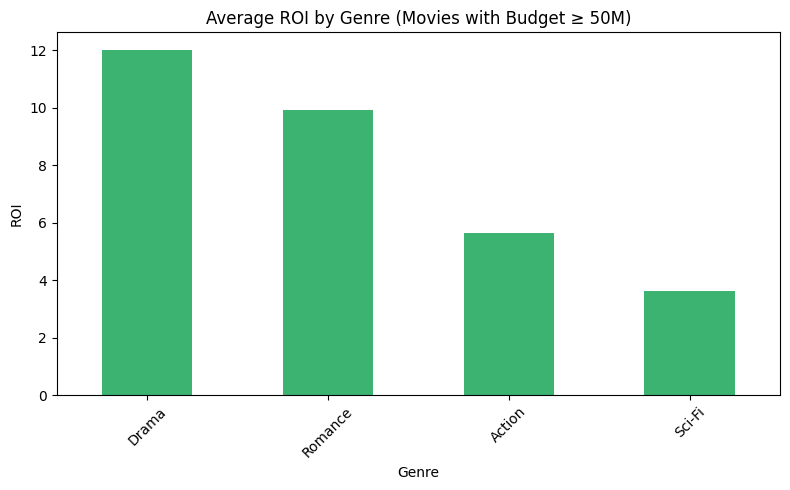

In [39]:
import matplotlib.pyplot as plt

# Group by Genre and calculate average ROI
genre_roi = df_filtered.groupby("Genre")["ROI"].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
genre_roi.plot(kind="bar", color="mediumseagreen")

plt.title("Average ROI by Genre (Movies with Budget ≥ 50M)")
plt.xlabel("Genre")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
